### Полиномиальная регрессия. Как из линейной регрессии сделать криволинейную?

Линейная модель (прямая линия):
![img](http://neerc.ifmo.ru/wiki/images/f/f0/Linear_regression_example.png)

***А что если нельзя провести оптимальную прямую линию?***
<a href="https://ibb.co/XXBwvBP"><img src="https://i.ibb.co/Wn9TY9X/9.jpg" alt="9" border="0"></a>

Нужно использовать нелинейную модель:
![img](https://www.machinelearningmastery.ru/img/0-399364-636329.png)

***Модель полиномиальной регрессии (polynomial regression)*** - это обобщенная линейная модель с параметризованной степенью многочлена.

![img](https://russianblogs.com/images/753/361716febc5a15ae65cdba4394db1f69.png)

Многочлен 1-й степени:

$$ y=ax+b $$

Многочлен 3-й степени:
$$ y = ax^3 + bx^2 + cx + d $$

Несмотря на то, что мы можем использовать полиномиальную регрессию для моделирования нелинейных связей, она по-прежнему рассматривается как модель множественной линейной регрессии, ввиду
линейных коэффициентов регрессии.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures  # Класс преобразователь

[Ссылка на документацию](https://scikit-learn.org/stable/modules/preprocessing.html#polynomial-features)

In [ ]:
# Моделируем данные
X = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0])[:, np.newaxis]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8])

In [ ]:
X

array([[258.],
       [270.],
       [294.],
       [320.],
       [342.],
       [368.],
       [396.],
       [446.],
       [480.],
       [586.]])

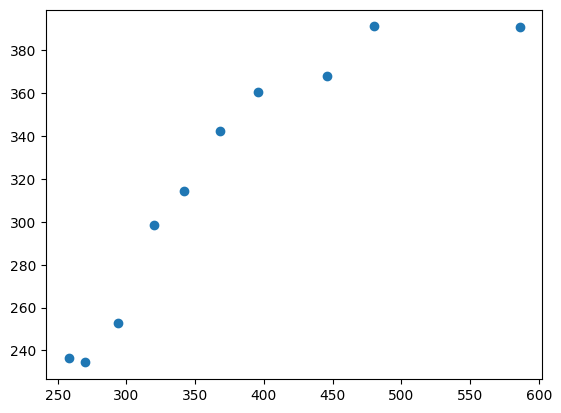

In [ ]:
plt.scatter(X, y)

In [ ]:
lr = LinearRegression() # Линейная регрессия
lr.fit(X, y) # Обучим линейную регрессию

LinearRegression()

In [ ]:
X_ = np.arange(250, 600, 10)[:, np.newaxis] # Точки для предсказания
y_lr = lr.predict(X_) # Предсказываем y для линейной регрессии

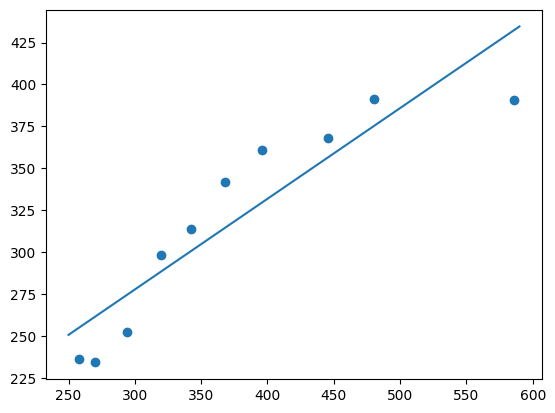

In [ ]:
plt.scatter(X, y)
plt.plot(X_, y_lr)

In [ ]:
pr = LinearRegression() # Полиномиальная регрессия

In [ ]:
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)       # Преобразуем данные

In [ ]:
X_quad

array([[1.00000e+00, 2.58000e+02, 6.65640e+04],
       [1.00000e+00, 2.70000e+02, 7.29000e+04],
       [1.00000e+00, 2.94000e+02, 8.64360e+04],
       [1.00000e+00, 3.20000e+02, 1.02400e+05],
       [1.00000e+00, 3.42000e+02, 1.16964e+05],
       [1.00000e+00, 3.68000e+02, 1.35424e+05],
       [1.00000e+00, 3.96000e+02, 1.56816e+05],
       [1.00000e+00, 4.46000e+02, 1.98916e+05],
       [1.00000e+00, 4.80000e+02, 2.30400e+05],
       [1.00000e+00, 5.86000e+02, 3.43396e+05]])

In [ ]:
pr.fit(X_quad, y) # Обучаем полиномиальную регрессию

LinearRegression()

In [ ]:
y_pr = pr.predict(quadratic.fit_transform(X_)) # Предсказываем y для полиномиальной регрессии

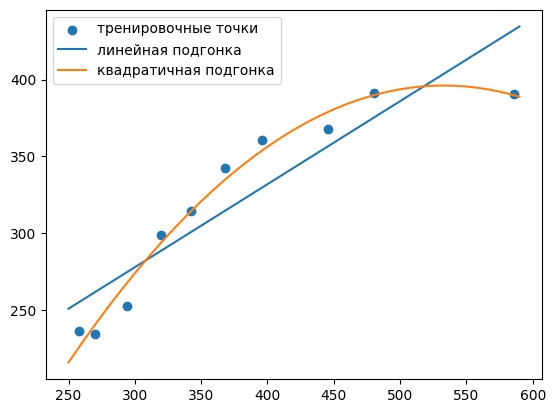

In [ ]:
plt.scatter(X, y, label = 'тренировочные точки')
plt.plot(X_, y_lr, label = 'линейная подгонка')
plt.plot(X_, y_pr, label = 'квадратичная подгонка')
plt.legend(loc='upper left')
plt.show()

Задание 1. Оцените полученные модели с помощью коэффициента детерминации и MSE. Что можно сказать о качестве моделей?

Замечание!!! mean_squared_error принимает 1-м аргументом истинные значения y, а 2-м предсказанные (см. документацию!).
Получается, для линейной регрессии:

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Для наших синих точек

y_pred = lr.predict(X)
print('Для линейной регрессии (MSE):', mean_squared_error(y, y_pred))
print('Для линейной регрессии (коэффицент детерминации):', r2_score(y, y_pred))

# Аналогично выполните для полиномиальной модели и сравните результат
y_pred_square = pr.predict(quadratic.fit_transform(X))
print('Для полиномиальной регрессии (MSE):', mean_squared_error(y, y_pred_square))
print('Для полиномиальной регрессии (коэффицент детерминации):', r2_score(y, y_pred_square))

Для линейной регрессии (MSE): 569.7796663183207
Для линейной регрессии (коэффицент детерминации): 0.8317053837891232
Для полиномиальной регрессии (MSE): 61.33021451744772
Для полиномиальной регрессии (коэффицент детерминации): 0.9818850241163604


Вывод: среднеквадратическая ошибка в случае полиномиальной регрессии меньше, а следовательно модель полиномиальной регрессии более качественная.

Задание 2. Постройте полиномиальную модель, описывающую следующую зависимость:

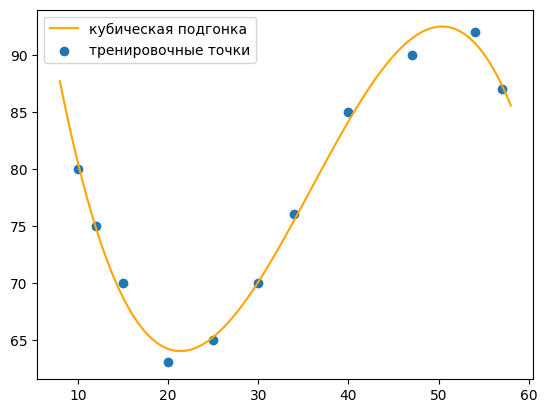

In [ ]:
x = np.array([10, 12, 15, 20, 25, 30, 34, 40, 47, 54, 57])[:, np.newaxis]
y = np.array([80, 75, 70, 63, 65, 70, 76, 85, 90, 92, 87 ])

pr = LinearRegression()
quadratic = PolynomialFeatures(degree=3)
x_quad = quadratic.fit_transform(x)
pr.fit(x_quad, y)
x_ = np.linspace(8, 58, 100)[:, np.newaxis]
y_pr = pr.predict(quadratic.fit_transform(x_))

plt.plot(x_, y_pr, label = 'кубическая подгонка', color = 'orange')
plt.scatter(x, y, label = 'тренировочные точки')
plt.legend(loc='upper left')
plt.show()

Задание 3. Какую степень полинома вы использовали? Попробуйте изменить степень полинома, например, на 2, 5, 15? Как меняется результат?

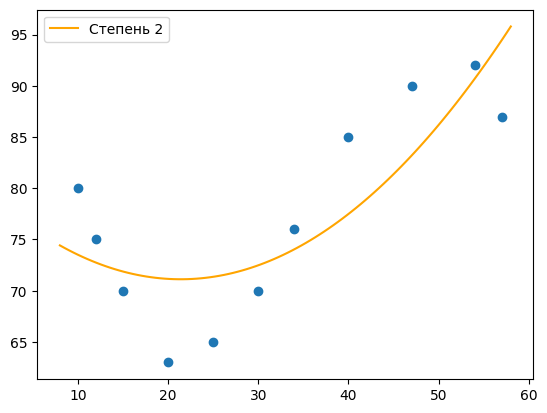

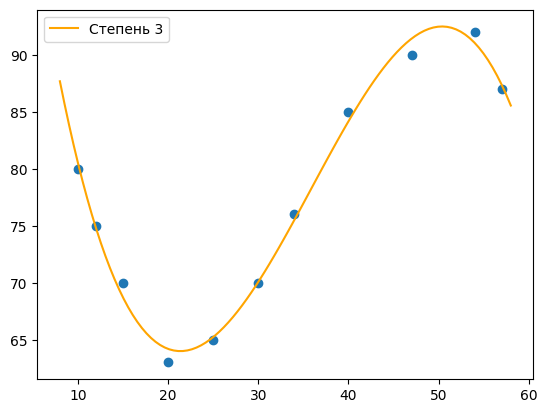

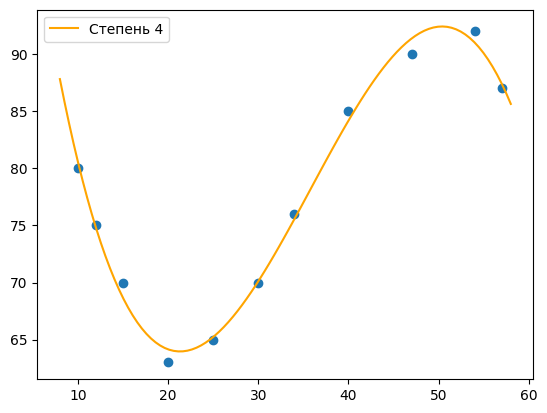

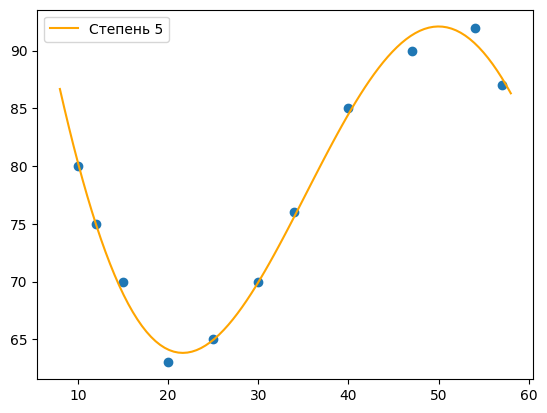

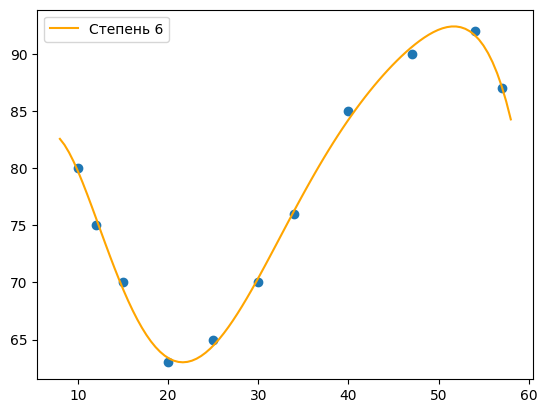

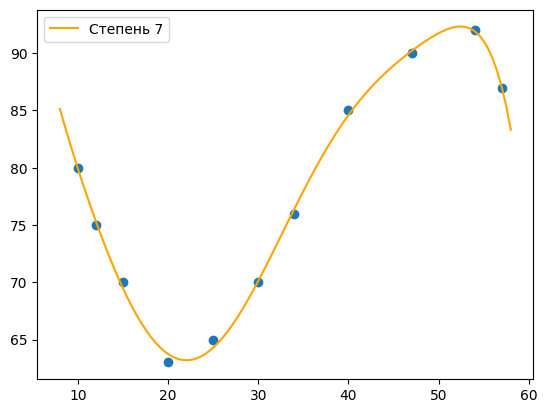

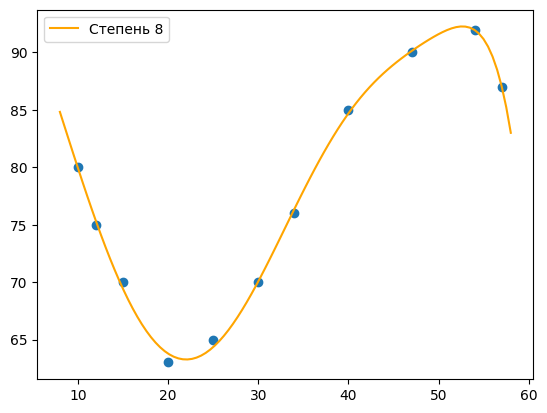

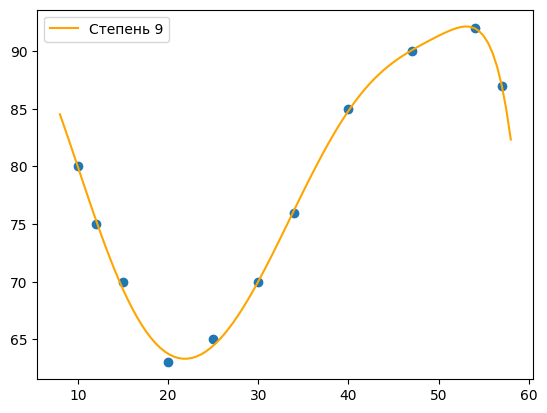

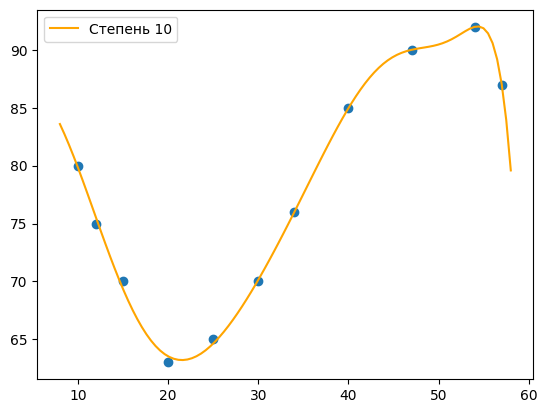

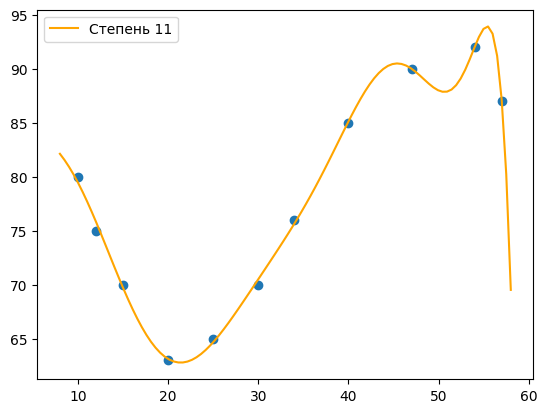

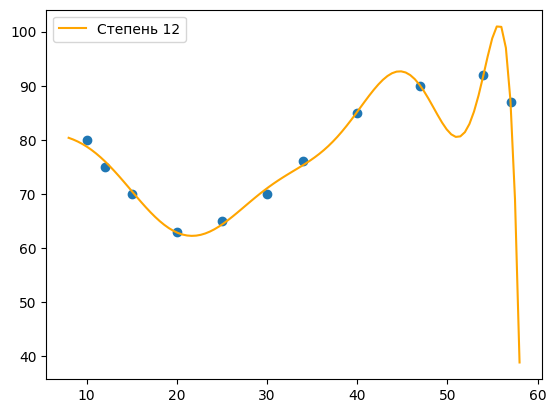

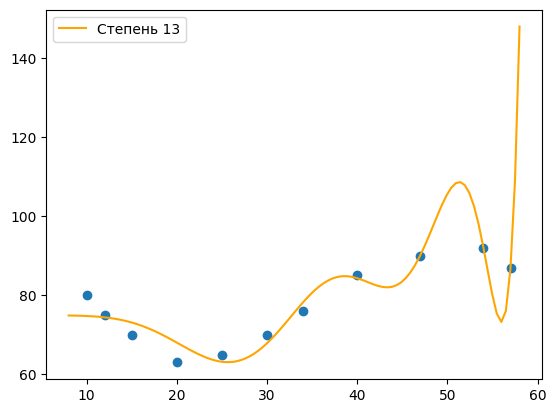

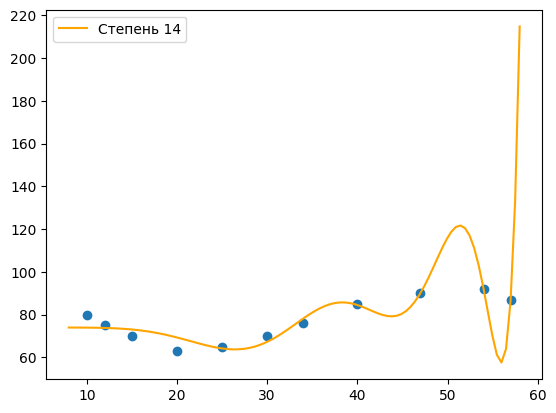

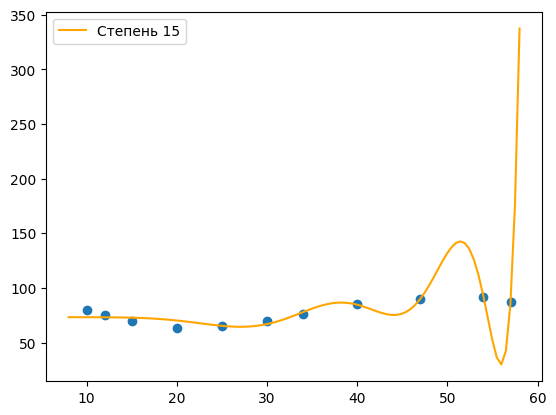

,i,Score,MAE,MSE,RMSE,Coefficents
0,2,0.674454,4.787059,29.794158,5.458403,"[0.0, -0.7877930568183195, 0.018409135858239334]"
1,3,0.992585,0.687527,0.678625,0.823787,"[0.0, -7.529456192945486, 0.25098965105927906,..."
2,4,0.992601,0.694293,0.677117,0.822871,"[0.0, -7.6853211428943675, 0.25953985467334045..."
3,5,0.993205,0.616835,0.621919,0.788619,"[0.0, -4.907262049657518, 0.04779020766560985,..."
4,6,0.997447,0.450860,0.233640,0.483363,"[0.0, 15.25223768177308, -1.9115656884981371, ..."
5,7,0.998190,0.328357,0.165610,0.406952,"[0.0, -9.586234573517821, 1.0311136661872429, ..."
6,8,0.998285,0.301881,0.156991,0.396222,"[0.0, -0.05208946324824978, -0.379999196709179..."
7,9,0.998470,0.265961,0.140027,0.374202,"[0.0, -0.0005469218483872412, -0.0072593448841..."
8,10,0.998842,0.220308,0.106023,0.325612,"[0.0, -4.425590831084667e-05, -6.5762647679365..."
9,11,0.998443,0.281513,0.142543,0.377549,"[4.0432679893598904e-07, -1.7228061349616006e-..."


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
import pandas as pd

data = []

for i in range(2, 16):
  pip = Pipeline([('quad', PolynomialFeatures(degree=i)), ('lr', LinearRegression())])
  pip.fit(x, y)
  y_ = pip.predict(x_)
  plt.scatter(x, y)
  plt.plot(x_, y_, label=f'Степень {i}', color='orange')
  plt.legend()
  plt.show()
  y_ = pip.predict(x)
  data.append([i, r2_score(y, y_), mean_absolute_error(y, y_),
               mean_squared_error(y, y_), root_mean_squared_error(y, y_), pip['lr'].coef_])

df = pd.DataFrame(data, columns=['i', 'Score', 'MAE', 'MSE', 'RMSE', 'Coefficents'])
df